In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
import os
import os.path
from pathlib import Path
import glob

In [4]:
preds = pd.read_csv('../predictions.csv')

In [5]:
preds

,Unnamed: 0,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a03_star_or_artifact_debiased,t02_edgeon_a04_yes_debiased,t02_edgeon_a05_no_debiased,t03_bar_a06_bar_debiased,t03_bar_a07_no_bar_debiased,t04_spiral_a08_spiral_debiased,t04_spiral_a09_no_spiral_debiased,...,t09_bulge_shape_a27_no_bulge_debiased,t10_arms_winding_a28_tight_debiased,t10_arms_winding_a29_medium_debiased,t10_arms_winding_a30_loose_debiased,t11_arms_number_a31_1_debiased,t11_arms_number_a32_2_debiased,t11_arms_number_a33_3_debiased,t11_arms_number_a34_4_debiased,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_debiased
0,235996.jpg,0.138325,0.840252,0.007273,0.004449,0.989116,0.456356,0.471264,0.858118,0.117598,...,0.046455,0.532881,0.343952,0.057146,0.030216,0.192798,0.144602,0.056456,0.029882,0.334906
1,126015.jpg,0.778961,0.167494,0.053080,0.033860,0.912012,0.111592,0.809586,0.138932,0.802890,...,0.013941,0.101510,0.066704,0.055216,0.014812,0.033486,0.002999,0.003518,0.011372,0.163882
2,79226.jpg,0.770121,0.174363,0.057029,0.040387,0.902505,0.118862,0.804180,0.148667,0.793856,...,0.016602,0.108761,0.072482,0.060033,0.016910,0.037418,0.003554,0.004120,0.013039,0.170384
3,1678.jpg,0.303880,0.678710,0.026069,0.038801,0.940679,0.370463,0.579637,0.669237,0.307666,...,0.092900,0.399006,0.294636,0.108033,0.056142,0.200034,0.089902,0.046308,0.044073,0.334447
4,56515.jpg,0.464038,0.510049,0.036737,0.024657,0.950500,0.292463,0.628456,0.488009,0.459535,...,0.045314,0.300701,0.211727,0.089251,0.041506,0.128954,0.045466,0.029621,0.035645,0.287187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,219387.jpg,0.404609,0.577017,0.040735,0.062707,0.910233,0.329295,0.621433,0.557146,0.419981,...,0.095805,0.335144,0.256914,0.122955,0.061623,0.184328,0.064439,0.040129,0.046431,0.312265
3196,77426.jpg,0.692632,0.249845,0.069520,0.086735,0.852444,0.165589,0.766892,0.219453,0.733015,...,0.040983,0.147670,0.111839,0.093059,0.031313,0.068011,0.008295,0.008851,0.023314,0.201925
3197,239341.jpg,0.566109,0.405559,0.057151,0.064616,0.895281,0.249701,0.689407,0.386282,0.567364,...,0.061312,0.255904,0.186951,0.108927,0.049601,0.126367,0.031223,0.024058,0.038413,0.273404
3198,179734.jpg,0.576179,0.390029,0.041081,0.024145,0.946894,0.231824,0.681911,0.367852,0.563332,...,0.030708,0.239443,0.161469,0.077133,0.032465,0.093508,0.024417,0.018033,0.027130,0.254580


In [6]:
df = preds

In [17]:
preds.iloc[:,1:] = preds.iloc[:,1:].round().astype(bool)

In [7]:
df.index=df.iloc[:,0]

In [8]:
df.drop(df.columns[0], axis=1,inplace=True)

In [22]:
preds

,Unnamed: 0,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a03_star_or_artifact_debiased,t02_edgeon_a04_yes_debiased,t02_edgeon_a05_no_debiased,t03_bar_a06_bar_debiased,t03_bar_a07_no_bar_debiased,t04_spiral_a08_spiral_debiased,t04_spiral_a09_no_spiral_debiased,...,t09_bulge_shape_a27_no_bulge_debiased,t10_arms_winding_a28_tight_debiased,t10_arms_winding_a29_medium_debiased,t10_arms_winding_a30_loose_debiased,t11_arms_number_a31_1_debiased,t11_arms_number_a32_2_debiased,t11_arms_number_a33_3_debiased,t11_arms_number_a34_4_debiased,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_debiased
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
235996.jpg,235996.jpg,0.183176,0.821669,0.011989,0.017023,0.972766,0.343938,0.621873,0.817172,0.178729,...,0.070134,0.509661,0.337897,0.081683,0.038450,0.279433,0.122194,0.057646,0.064289,0.317044
126015.jpg,126015.jpg,0.782551,0.205634,0.023315,0.022117,0.956936,0.116203,0.827962,0.144704,0.816098,...,0.006214,0.063684,0.055149,0.028209,0.020204,0.031464,0.003086,0.000991,0.003114,0.074339
79226.jpg,79226.jpg,0.744491,0.245487,0.024362,0.037268,0.939281,0.133799,0.805537,0.172287,0.786088,...,0.009997,0.072611,0.065662,0.035279,0.022728,0.040892,0.003940,0.001356,0.003756,0.085898
1678.jpg,1678.jpg,0.363297,0.661323,0.013910,0.285403,0.749519,0.259506,0.646256,0.458276,0.461144,...,0.120124,0.197678,0.163778,0.091361,0.025760,0.155196,0.012762,0.006019,0.008016,0.214258
56515.jpg,56515.jpg,0.655081,0.343649,0.030924,0.026517,0.952411,0.174119,0.764950,0.276985,0.687117,...,0.014976,0.142326,0.107216,0.049188,0.035050,0.072435,0.012232,0.004814,0.010960,0.132577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219387.jpg,219387.jpg,0.456449,0.553148,0.026379,0.065737,0.917152,0.255962,0.688897,0.487723,0.482732,...,0.051565,0.251228,0.185417,0.086405,0.043699,0.151924,0.030953,0.014521,0.022055,0.213677
77426.jpg,77426.jpg,0.747333,0.242677,0.024164,0.035993,0.940608,0.133438,0.805181,0.170174,0.787733,...,0.009646,0.071855,0.064498,0.034815,0.022469,0.040261,0.003873,0.001321,0.003692,0.084829
239341.jpg,239341.jpg,0.479595,0.530596,0.030686,0.116266,0.871392,0.261045,0.684966,0.449824,0.521312,...,0.066291,0.224425,0.179977,0.096222,0.046422,0.152174,0.026808,0.012953,0.019486,0.210743


In [9]:
def tuning_fork(df):
    '''
    casts dataframe values to booleans corresponding to Hubble's galaxy classification scheme 
    '''
    df = df.round().astype(bool)
    df = df.iloc[:,[0,3,5,7,12,23]]
    df.columns=['eliptical','edge_on','barred_spiral','spiral','bulge','merger']
    return df
    

In [10]:
tuned_df = tuning_fork(df)

In [11]:
tuned_df

,eliptical,edge_on,barred_spiral,spiral,bulge,merger
Unnamed: 0,,,,,,
235996.jpg,False,False,False,True,False,False
126015.jpg,True,False,False,False,False,False
79226.jpg,True,False,False,False,False,False
1678.jpg,False,False,False,True,False,False
56515.jpg,False,False,False,False,False,False
...,...,...,...,...,...,...
219387.jpg,False,False,False,True,False,False
77426.jpg,True,False,False,False,False,False
239341.jpg,True,False,False,False,False,False


In [92]:
img_dir = Path("../images_gz2/images")
jpg_path = list(img_dir.glob(r"*.jpg"))

In [93]:
jpg_path_series = pd.Series(jpg_path,name='JPG').astype(str)

In [52]:
jpg_path_series

0         ../images_gz2/images/124270.jpg
1         ../images_gz2/images/162042.jpg
2         ../images_gz2/images/188964.jpg
3         ../images_gz2/images/141592.jpg
4          ../images_gz2/images/11080.jpg
                       ...               
243429     ../images_gz2/images/15489.jpg
243430    ../images_gz2/images/176213.jpg
243431     ../images_gz2/images/35499.jpg
243432    ../images_gz2/images/236978.jpg
243433    ../images_gz2/images/246484.jpg
Name: JPG, Length: 243434, dtype: object

In [66]:
img_ids = [id for id in jpg_path_series[i].split('/',3)[3] for i in range(len(jpg_path_series))]

NameError: name 'i' is not defined

In [12]:
df_true = pd.read_csv('../data/gz2_debiased.csv')

In [13]:
df_true

,asset_id,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a03_star_or_artifact_debiased,t02_edgeon_a04_yes_debiased,t02_edgeon_a05_no_debiased,t03_bar_a06_bar_debiased,t03_bar_a07_no_bar_debiased,t04_spiral_a08_spiral_debiased,t04_spiral_a09_no_spiral_debiased,...,t09_bulge_shape_a27_no_bulge_debiased,t10_arms_winding_a28_tight_debiased,t10_arms_winding_a29_medium_debiased,t10_arms_winding_a30_loose_debiased,t11_arms_number_a31_1_debiased,t11_arms_number_a32_2_debiased,t11_arms_number_a33_3_debiased,t11_arms_number_a34_4_debiased,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_debiased
0,58957,0.000,0.988,0.012,0.047681,0.953848,0.025,0.975305,1.000000,0.000000,...,0.0,0.676487,0.301320,0.025,0.0,0.075071,0.024617,0.049583,0.482646,0.394506
1,193641,0.024,0.976,0.000,0.000000,1.000000,0.080,0.920038,1.000000,0.000000,...,0.0,0.871056,0.080068,0.050,0.0,0.098063,0.049983,0.024977,0.504833,0.322743
2,55934,0.780,0.139,0.081,0.000000,1.000000,0.400,0.600190,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,158501,0.036,0.964,0.000,0.036974,0.963112,0.038,0.962028,0.962366,0.038012,...,1.0,0.640306,0.319844,0.040,0.0,0.079018,0.240087,0.200076,0.241322,0.239765
4,110939,0.767,0.186,0.047,0.125182,0.878825,0.000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239384,262969,0.823,0.174,0.003,0.857000,0.143000,0.000,1.000000,0.000000,1.000000,...,1.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
239385,275883,0.541,0.263,0.197,0.000000,1.000000,0.000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
239386,282536,0.789,0.156,0.055,0.000000,1.000000,0.143,0.857000,0.286000,0.714000,...,0.0,0.500000,0.500000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
239387,284172,0.531,0.278,0.191,0.000000,1.000000,0.000,1.000000,0.076000,0.924000,...,0.0,1.000000,0.000000,0.000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
df_true.index=df_true.iloc[:,0]

In [15]:
df_true.drop(df_true.columns[0], axis=1,inplace=True)

In [16]:
df_true

,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a03_star_or_artifact_debiased,t02_edgeon_a04_yes_debiased,t02_edgeon_a05_no_debiased,t03_bar_a06_bar_debiased,t03_bar_a07_no_bar_debiased,t04_spiral_a08_spiral_debiased,t04_spiral_a09_no_spiral_debiased,t05_bulge_prominence_a10_no_bulge_debiased,...,t09_bulge_shape_a27_no_bulge_debiased,t10_arms_winding_a28_tight_debiased,t10_arms_winding_a29_medium_debiased,t10_arms_winding_a30_loose_debiased,t11_arms_number_a31_1_debiased,t11_arms_number_a32_2_debiased,t11_arms_number_a33_3_debiased,t11_arms_number_a34_4_debiased,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_debiased
asset_id,,,,,,,,,,,,,,,,,,,,,
58957,0.000,0.988,0.012,0.047681,0.953848,0.025,0.975305,1.000000,0.000000,0.050,...,0.0,0.676487,0.301320,0.025,0.0,0.075071,0.024617,0.049583,0.482646,0.394506
193641,0.024,0.976,0.000,0.000000,1.000000,0.080,0.920038,1.000000,0.000000,0.000,...,0.0,0.871056,0.080068,0.050,0.0,0.098063,0.049983,0.024977,0.504833,0.322743
55934,0.780,0.139,0.081,0.000000,1.000000,0.400,0.600190,0.000000,1.000000,0.000,...,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
158501,0.036,0.964,0.000,0.036974,0.963112,0.038,0.962028,0.962366,0.038012,0.077,...,1.0,0.640306,0.319844,0.040,0.0,0.079018,0.240087,0.200076,0.241322,0.239765
110939,0.767,0.186,0.047,0.125182,0.878825,0.000,1.000000,0.000000,1.000000,0.000,...,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262969,0.823,0.174,0.003,0.857000,0.143000,0.000,1.000000,0.000000,1.000000,1.000,...,1.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
275883,0.541,0.263,0.197,0.000000,1.000000,0.000,1.000000,0.000000,1.000000,0.750,...,0.0,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
282536,0.789,0.156,0.055,0.000000,1.000000,0.143,0.857000,0.286000,0.714000,0.857,...,0.0,0.500000,0.500000,0.000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000


In [17]:
df_t_tuned = tuning_fork(df_true)

In [18]:
df_t_tuned

,eliptical,edge_on,barred_spiral,spiral,bulge,merger
asset_id,,,,,,
58957,False,False,False,True,False,False
193641,False,False,False,True,False,False
55934,True,False,False,False,False,True
158501,False,False,False,True,False,False
110939,True,False,False,False,False,False
...,...,...,...,...,...,...
262969,True,True,False,False,False,False
275883,True,False,False,False,False,False
282536,True,False,False,False,False,False


In [19]:
df_p_tuned = tuned_df

In [43]:
df_t_tuned[df_t_tuned.edge_on==True]

,eliptical,edge_on,barred_spiral,spiral,bulge,merger
asset_id,,,,,,
162781,True,True,False,False,False,False
140163,True,True,False,False,True,False
172941,True,True,False,False,False,False
83385,False,True,False,True,False,False
103622,True,True,True,False,False,False
...,...,...,...,...,...,...
263464,True,True,False,False,False,False
131860,True,True,False,False,False,False
264076,True,True,False,False,False,False


In [50]:
df_p_tuned[df_p_tuned.edge_on==True][50:100]

,eliptical,edge_on,barred_spiral,spiral,bulge,merger
Unnamed: 0,,,,,,
255583.jpg,False,True,False,False,False,False
70541.jpg,False,True,False,False,False,False
249076.jpg,False,True,False,False,False,False
272880.jpg,False,True,False,True,False,False
38824.jpg,False,True,False,True,False,False
216046.jpg,False,True,False,False,False,False
53379.jpg,False,True,False,False,False,False
18398.jpg,False,True,False,False,False,False
255739.jpg,False,True,False,False,False,False


In [51]:
df_t_tuned.loc[272050]

eliptical        False
edge_on          False
barred_spiral    False
spiral            True
bulge            False
merger           False
Name: 272050, dtype: bool

In [45]:
df_p_tuned.loc['162781.jpg']

KeyError: '162781.jpg'

Text(0.5, 0, 'Predicted: Edge-On')

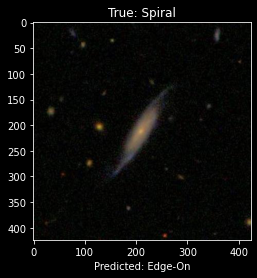

In [53]:
jpg = plt.imread('../images_gz2/images/272050.jpg')
plt.imshow(jpg)
plt.title('True: Spiral')
plt.xlabel('Predicted: Edge-On')

Text(0.5, 0, 'Predicted: Spiral')

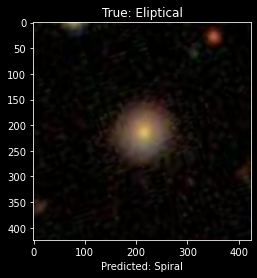

In [104]:
jpg = plt.imread('../images_gz2/images/179734.jpg')
plt.imshow(jpg)
plt.title('True: Eliptical')
plt.xlabel('Predicted: Spiral')

Text(0.5, 0, 'Predicted: Edge On')

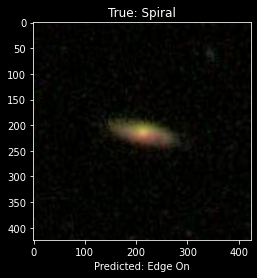

In [110]:
jpg = plt.imread('../images_gz2/images/42162.jpg')
plt.imshow(jpg)
plt.title('True: Spiral')
plt.xlabel('Predicted: Edge On')

Text(0.5, 0, 'Predicted: Spiral')

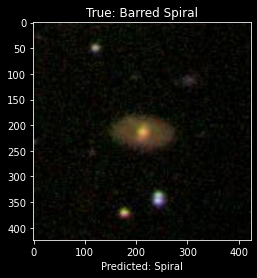

In [121]:
jpg = plt.imread('../images_gz2/images/1678.jpg')
plt.imshow(jpg)
plt.title('True: Barred Spiral')
plt.xlabel('Predicted: Spiral')

Text(0.5, 0, 'Predicted: Spiral')

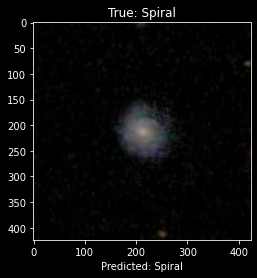

In [134]:
jpg = plt.imread('../images_gz2/images/184570.jpg')
plt.imshow(jpg)
plt.title('True: Spiral')
plt.xlabel('Predicted: Spiral')